In [1]:
# import all necessary packages
import time
import matplotlib.pyplot as plt
%matplotlib inline
from model import CovidSupermarketModel

Total simulation time: 0.64


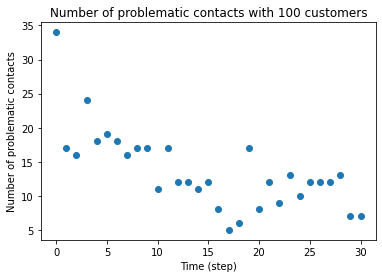

In [12]:
N_customers = 100
vaccination_prop = 0
avoid_radius = 3
n_steps = 30

time_start = time.time()
model = CovidSupermarketModel(N_customers, vaccination_prop, avoid_radius)
model.run_model(n_steps)
print("Total simulation time: {:.2f}".format(time.time()-time_start))

# collect data from model
model_data = model.datacollector.get_model_vars_dataframe()
# model_data.plot()

model_data = model_data.to_numpy().flatten()

plt.figure()
plt.title("Number of problematic contacts with {} customers".format(N_customers))
plt.scatter([i for i in range(len(model_data))], model_data)
plt.xlabel("Time (step)")
plt.ylabel("Number of problematic contacts")
plt.show()
